### Imports

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_py = "../ODE-RNN/Résultats/"
path_r = "../../data/synthetic_bph_1/Résultats regular time/"
path_simul = "../../data/synthetic_bph_1/Simulations regular time/"

### Gathering results

In [ ]:
pred_py = pd.DataFrame(columns=['individus', 'temps'])
for file in os.listdir(path_py):
    if "Prédictions" in file:
        df = pd.read_csv(path_py + file)
        pred_py = pd.merge(pred_py, df, on=['individus', 'temps'], how='outer')
pred_r_train = pd.read_csv(path_simul + 'simulation1.csv', sep=";", decimal=",")
pred_r_train = pred_r_train.loc[:,['individus', 'temps', 'y_fixed', 'y_fixed_obs', 'y_mixed', 'y_mixed_obs', "pred_mixed", "pred_fixed", "pred_naif_mixed", "pred_naif_fixed"]]
pred_r_test = pd.read_csv(path_r + 'Predictions.csv', sep=";", decimal=",")
pred_r_test = pred_r_test.loc[:,['individus', 'temps', 'pred_mixed_1', 'pred_fixed_1', 'pred_naif_fixed_1']]

KeyError: "None of [Index(['individus', 'temps', 'y_fixed', 'y_fixed_obs', 'y_mixed',\n       'y_mixed_obs', 'pred_mixed_1', 'pred_fixed_1', 'pred_naif_fixed_1'],\n      dtype='object')] are in the [columns]"

In [10]:
pred_r_test

,individus,temps,y_fixed,y_fixed_obs,y_mixed,y_mixed_obs,pred_mixed,pred_fixed,pred_naif_mixed,pred_naif_fixed
0,1,0,-10.553577,-10.268856,-2.200901,-0.464841,-0.508122,-10.580966,-0.402614,-9.814082
1,1,1,-2.244849,-2.119124,-2.052706,-1.628343,-2.072677,-2.262618,-2.572655,-2.371880
2,1,2,-0.499698,-0.167750,-1.570967,-4.471966,-1.803785,-0.506981,-2.476242,-0.256155
3,1,3,-0.269968,-0.205052,-1.189540,-1.556355,-1.346707,-0.269896,-1.950886,0.288122
4,1,4,-0.239532,-1.244952,-0.964018,-2.101427,-1.054117,-0.235199,-1.555398,0.548827
...,...,...,...,...,...,...,...,...,...,...
12995,500,21,-6.084309,-4.144099,-4.492386,-4.843864,-4.420657,-6.071659,-4.224384,-6.932050
12996,500,22,-5.786085,-6.413513,-4.234199,-3.239725,-4.150972,-5.773627,-4.010021,-6.809441
12997,500,23,-5.497343,-4.348794,-3.984220,0.087090,-3.889863,-5.485070,-3.805233,-6.692380
12998,500,24,-5.218527,-4.335813,-3.742836,-2.716920,-3.637730,-5.206434,-3.609916,-6.580895


#### Network results

In [ ]:
res_py = pd.DataFrame(columns=['Random effect', 'Model', "MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"])
for file in os.listdir(path_py):
    if "json" in file:
        df = pd.read_json(path_py + file)
        res_py = pd.concat((res_py,df))
res_py = res_py.sort_values(by=["MAE moyenne sur l'entrainement"])
res_py_fixed = res_py[res_py["Random effect"]=='Fixed'][['Model',"MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"]]
res_py_mixed = res_py[res_py["Random effect"]=='Mixed'][['Model',"MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"]]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9156\4058926855.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_py = pd.concat((res_py,df))


#### Results of R models

In [ ]:
res_r = pd.read_csv(path_r + "Performances_moyennes.csv")
scores = ["MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "Erreur moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "Erreur moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "Erreur moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité", "Erreur moyenne sur le test bruité"] 
res_oracle_mixed = res_r[[c for c in res_r.columns if ("naif" not in c) & ("mixed" in c) ]]
res_oracle_fixed = res_r[[c for c in res_r.columns if ("naif" not in c) & ("fixed" in c) ]]
res_naif_mixed = res_r[[c for c in res_r.columns if ("naif" in c) & ("mixed" in c)]]
res_naif_fixed = res_r[[c for c in res_r.columns if ("naif" in c) & ("fixed" in c)]]
res_oracle_mixed.columns = scores
res_oracle_fixed.columns = scores
res_naif_mixed.columns = scores
res_naif_fixed.columns = scores
res_oracle_mixed.loc[:,['Model']] = 'Oracle'
res_oracle_fixed.loc[:,['Model']] = 'Oracle'
res_naif_mixed.loc[:,['Model']] = 'Naif'
res_naif_fixed.loc[:,['Model']] = 'Naif'

In [ ]:
res_fixed = pd.concat((res_py_fixed, res_oracle_fixed, res_naif_fixed))
res_mixed = pd.concat((res_py_mixed, res_oracle_mixed, res_naif_mixed))

## Performances in predicting with fixed effects

In [ ]:
res_fixed[[c for c in res_fixed.columns if 'Erreur' not in c]]

,Model,MAE moyenne sur l'entrainement,MSE moyenne sur l'entrainement,MAE moyenne sur l'entrainement bruité,MSE moyenne sur l'entrainement bruité,MAE moyenne sur le test,MSE moyenne sur le test,MAE moyenne sur le test bruité,MSE moyenne sur le test bruité
0,ODE RNN,0.189537,0.066057,0.809369,1.021038,0.229185,0.135205,0.836202,1.108728
0,LSTM,0.306453,0.236836,0.869056,1.203338,0.278484,0.410434,0.885074,1.398544
0,RNN,0.414834,0.638510,0.839305,1.152493,0.546083,1.126085,1.059920,2.098608
0,Oracle,0.010957,0.000216,0.011199,0.000232,0.797762,0.999853,0.801426,1.001551
0,Naif,2.340459,12.021943,2.493645,13.790546,2.519020,13.020831,2.670302,14.811631


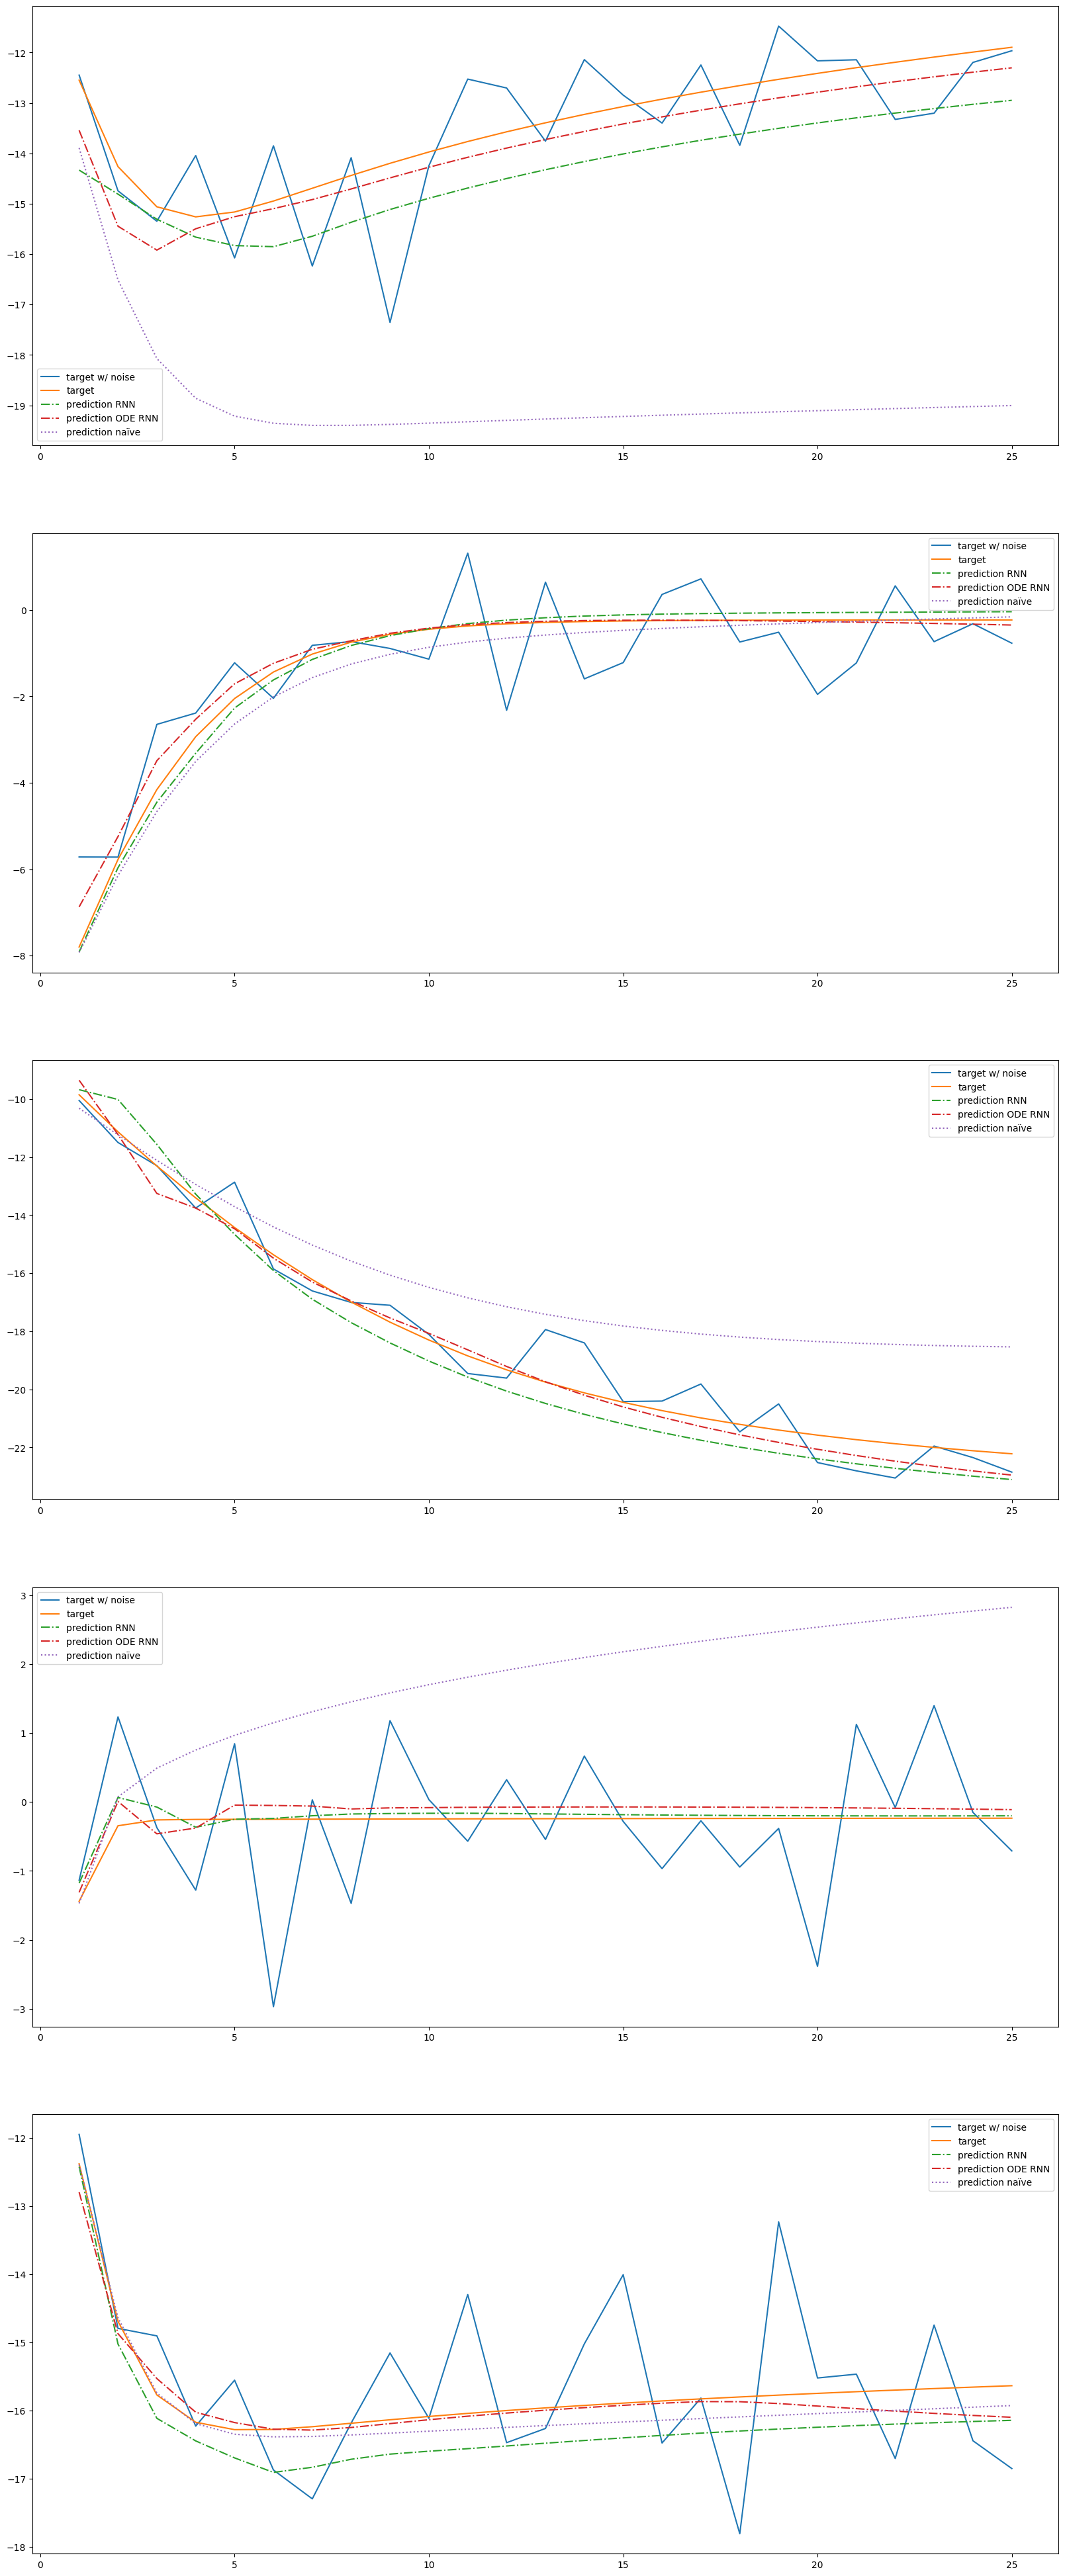

In [ ]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_fixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_fixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_RNN_Fixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_ODE RNN_Fixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['pred_naif_fixed'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()

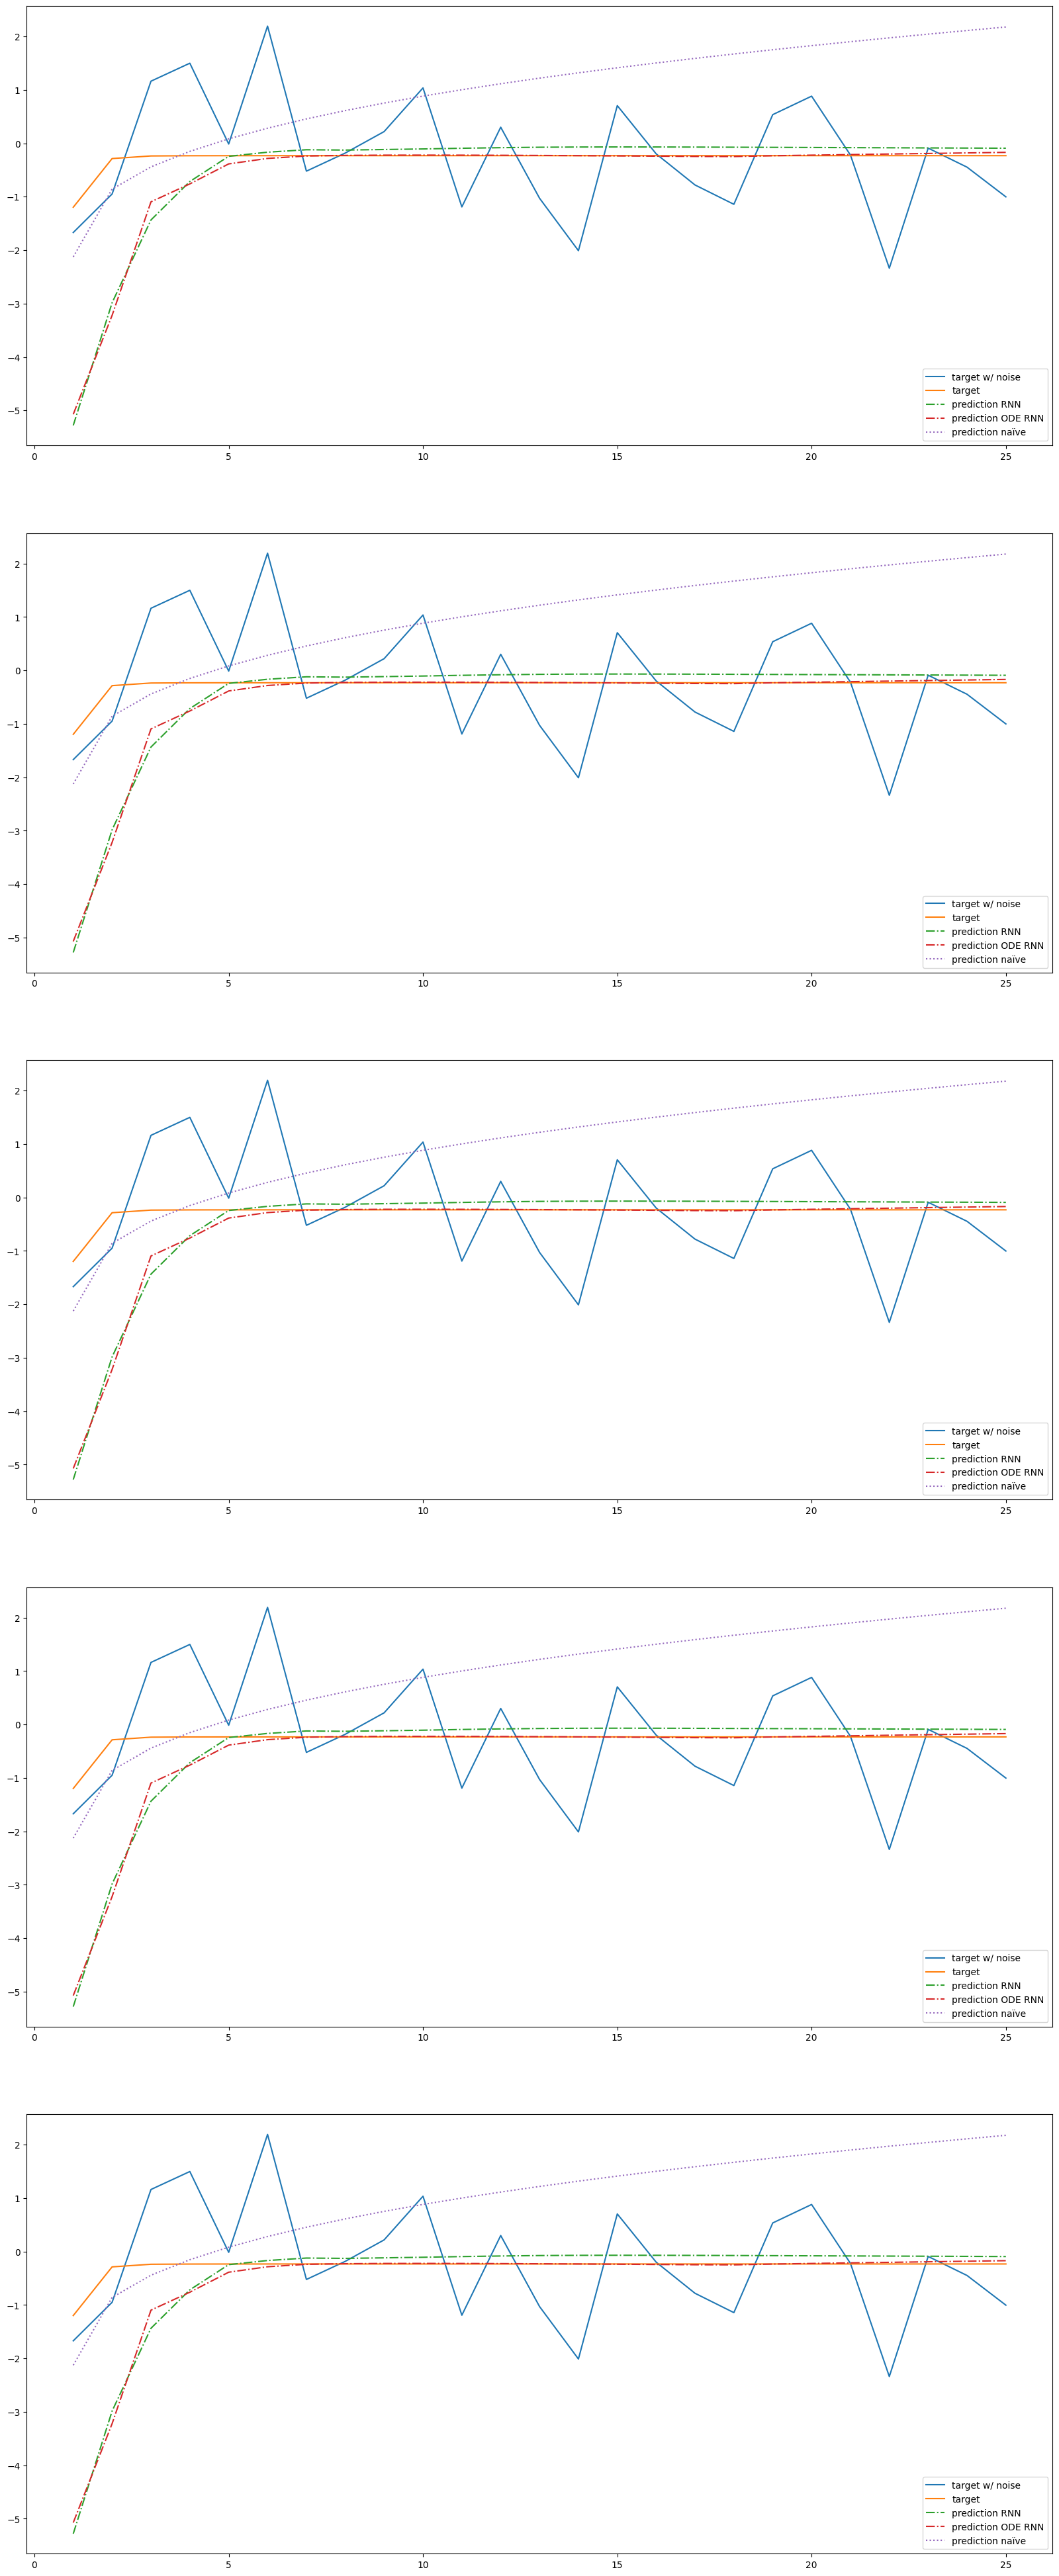

In [9]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    ex[k] = 17
    axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['y_fixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['y_fixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_RNN_Fixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_ODE RNN_Fixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['pred_naif_fixed'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()

## Performance in predicting with mixed effects

In [ ]:
res_mixed[[c for c in res_mixed.columns if 'Erreur' not in c]]

,Model,MAE moyenne sur l'entrainement,MSE moyenne sur l'entrainement,MAE moyenne sur l'entrainement bruité,MSE moyenne sur l'entrainement bruité,MAE moyenne sur le test,MSE moyenne sur le test,MAE moyenne sur le test bruité,MSE moyenne sur le test bruité
0,ODE RNN,1.857024,10.330460,1.458954,3.762972,9.286964,425.196719,9.486616,425.853587
0,RNN,3.797926,95.366120,3.780676,98.809793,9.979000,472.178010,10.133016,472.951473
0,LSTM,4.360697,194.849375,4.158494,224.474550,10.244348,521.161527,10.405457,521.062859
0,Oracle,0.200698,0.077528,0.200202,0.080565,0.763882,0.924996,0.758376,0.914418
0,Naif,0.278502,0.167011,0.282411,0.182332,0.769399,0.947212,0.765085,0.942284


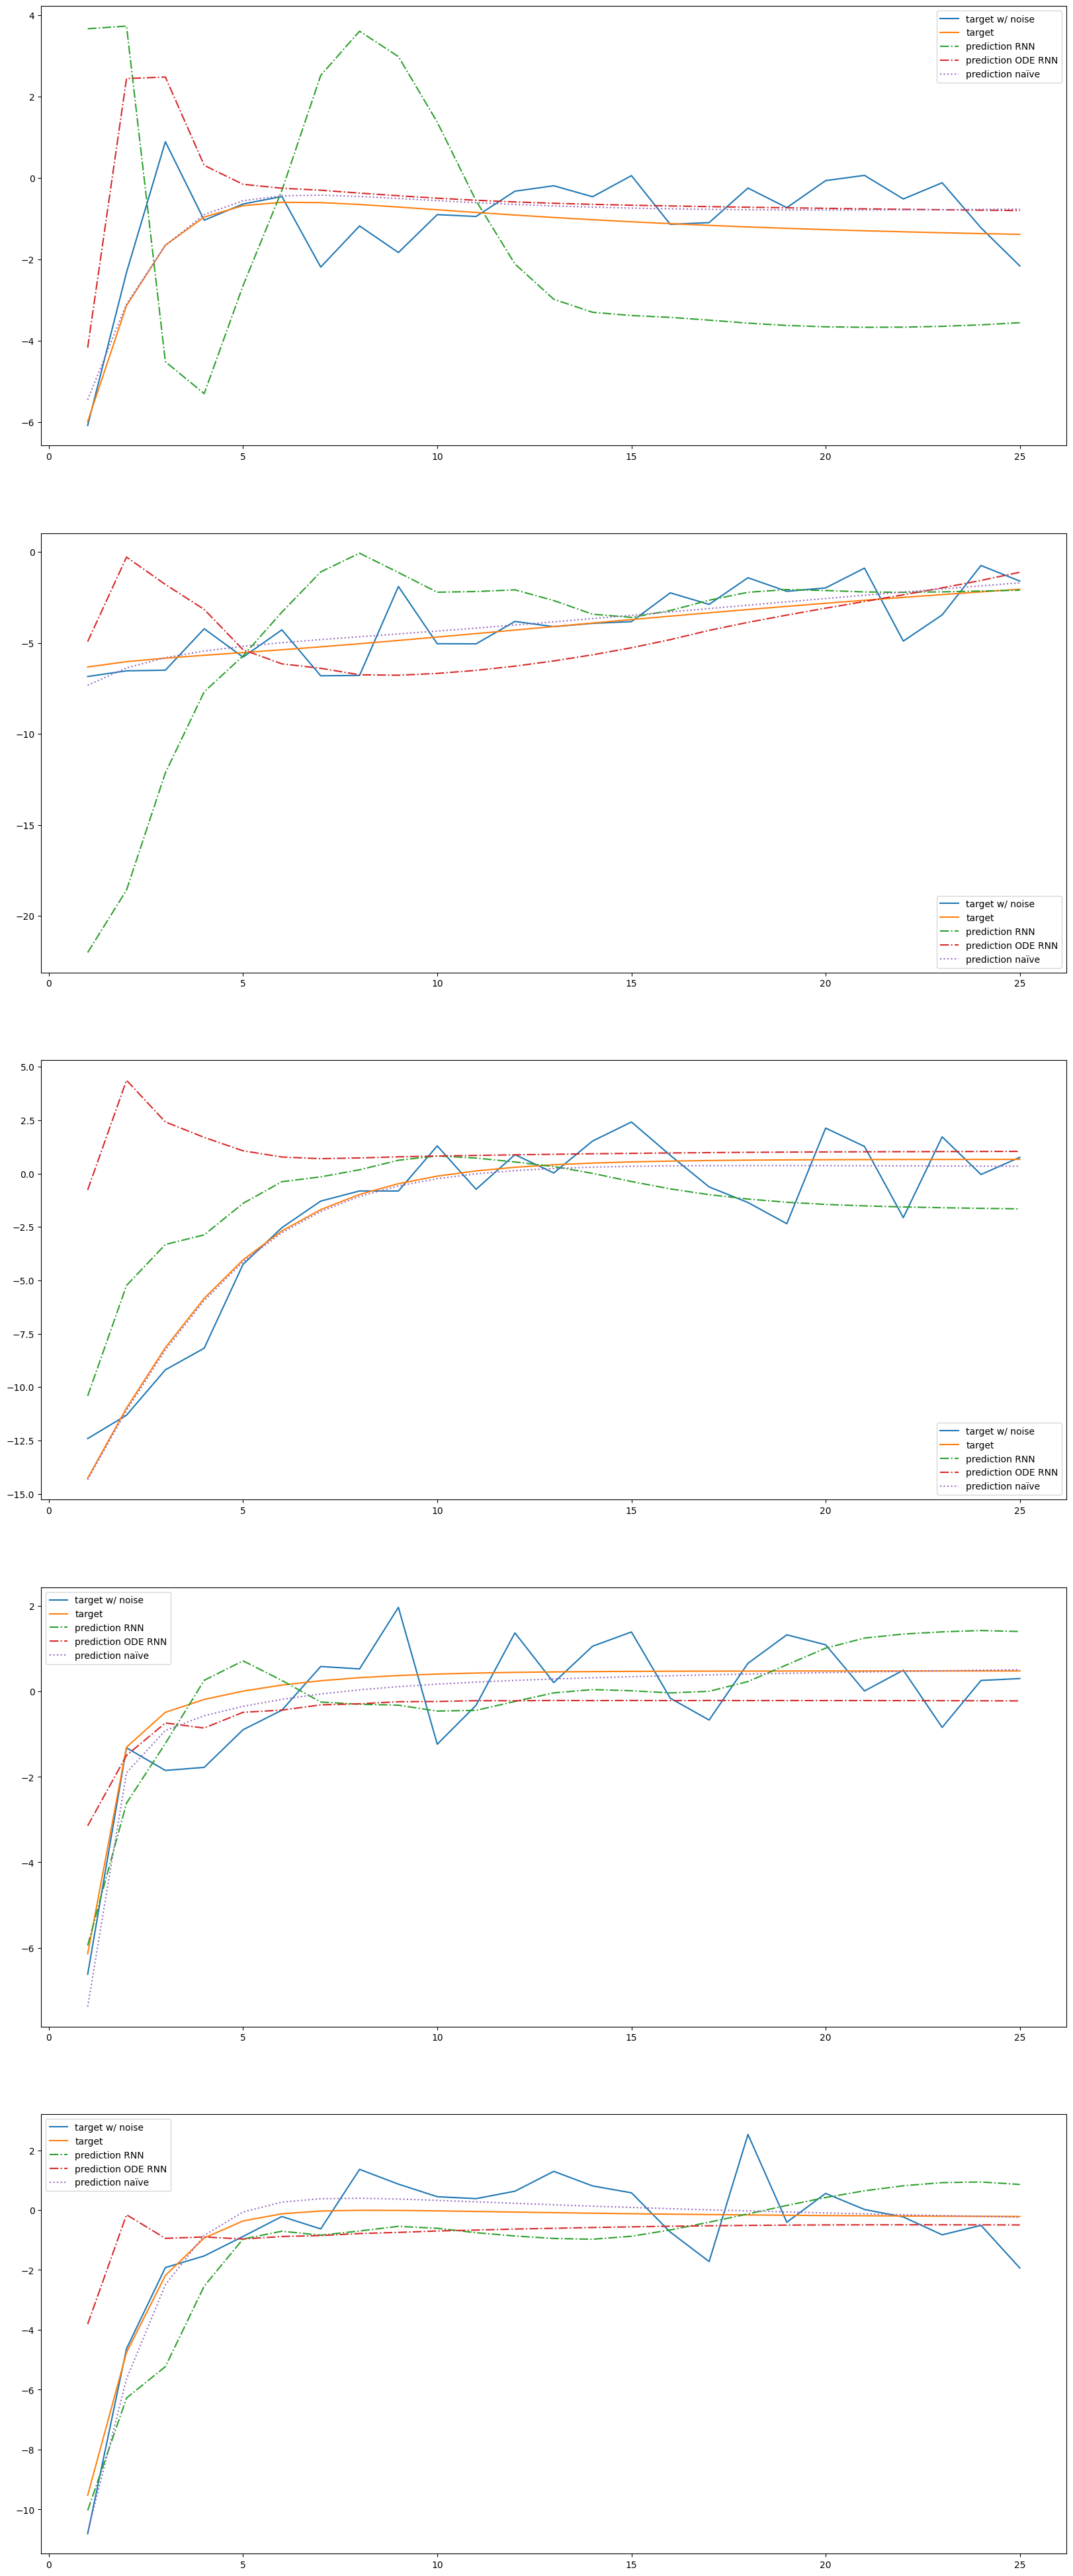

In [ ]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['temps'],
                pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['y_mixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['temps'],
                pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['y_mixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_RNN_Mixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_ODE RNN_Mixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['temps'],
                pred_r[(pred_r['temps']!=0) & (pred_r['individus']== ex[k])]['pred_naif_mixed'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()